# Linear Regression Assignment  - Bike Sharing



## Business Challanges and their Objectives
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### Business Goal
BoomBikes want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Data Dictionary of the provided data set

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:

   - instant : record index
   - dteday : date
   - season : season (1:spring, 2:summer, 3:fall, 4:winter)
   - yr : year (0: 2018, 1:2019)
   - mnth : month ( 1 to 12)
   - holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
   - weekday : day of the week
   - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	 weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        
   - temp : temperature in Celsius
   - atemp: feeling temperature in Celsius
   - hum: humidity
   - windspeed: wind speed
   - casual: count of casual users
   - registered: count of registered users
   - cnt: count of total rental bikes including both casual and registered


## Step 1: Loading and Understanding the Data
  - Loading the required libraries
  - Loading the data
  - Understanding the data using data dictionary and available data
  
## Step 2: Data Analysis and Data Cleaning

  - Replacing Columns values with its meaning
  - Dropping the redundant columns based on the metada
  - Exploratory Data Analysis
      - Univariate /Bivariate and Multivariate Analysis
      - Handling Outliers / missing values
      - Correlation Analysis
      
## Step 3: Data Modelling
 - Dummy variable creation  
     - Catogorical variable has to converted to integer inorder to perform the Modelling.
 - Test / Train Split   
     - Regression algorithm will be trained on Train data and Tested on Test data. Out of Total 70% data will be allocated for Train and remaining for Test
 - Scaling the variables
     - Scaling the variable will not affect the Model parameters except coefficeints , Scaling will help Model interpretation and will help in covergence of the gradient descent        of the linear regression algorithm
 - Define the dependent and independet variables
     - Based on the Problem statement, define the Predictor and Target variable
     
## Step 4: Model Evaluation
- Residual analysis
- checking error terms are dependent or independent
- homoscedasticity of error terms 
- Predicting the Target variables
- Summary of the analysis

## Step 1: Loading and Understanding the Data


In [144]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Setting the width of the Jupyter Notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


# Data processing and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime, timedelta, date, time

# Data Modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score ,mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Version of libraries used in this project
#numpy - 1.24.1
#pandas - 1.3.4
#matplotlib.pyplot - 3.5.2
#seaborn - 0.12.2
#statmodels - 0.13.5
#sklearn - 0.0.post1

In [67]:
# Loading the data and viewing it
bike_data  = pd.read_csv('day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [68]:
# Looking for the data set shape.
bike_data.shape

(730, 16)

Observation - It has 730 rows and 16 columns . Column heading metadata provided as per the data set

In [69]:
# Looking for the attributes types. Majority of them as interger and some are floats
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Observation - From dteday column , day column can be extracted  , month and year already provided seperatly

In [70]:
# Looking for the data distribution pattern . Mainly this helps to under stand the dataspread.
# In most of the metrics Mean and Median are almost close
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [71]:
# Listing the columns values in order to match it with metadata
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [72]:
# Looking for any missing values in the 16 columns .
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Observation  - Based on the metrics , none of the columns contains NULL or NA values.

## Step 2: Data Analysis and Data Cleaning

  - Replacing Columns values with its meaning
  - Dropping the redundant columns based on the metada
  - Exploratory Data Analysis
      - Univariate /Bivariate and Multivariate Analysis
      - Handling Outliers
      - Correlation Analysis


### Replacing  some of the columns values with its meaning
- based on the metadata available , columns values can be mapped to its meaning. Below columns values will be mapping to its meaning .
- weathersit
- season
- weekday
- mnth

Note - yr already mapped as 0 and 1 corresponds to 2018 and 2019 . so no need to convert that to its value

In [73]:
# Extracting Date from the 'dteday'  column
bike_data['dteday']=pd.to_datetime(bike_data['dteday'],format='%d-%m-%Y')
bike_data['day']=pd.to_datetime(bike_data['dteday'],format='%d-%m-%Y').dt.day

In [74]:
#Updating weatherlist columns with its values
bike_data['weathersit'] = bike_data['weathersit'].map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

In [75]:
#Updating season columns with its values
bike_data['season'] = bike_data['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [76]:
#Updating weekday columns with its values
bike_data['weekday'] = bike_data['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [77]:
#Updating mnth columns with its values
bike_data['mnth'] = bike_data['mnth'].map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

### Dropping columns like 'casual','registered' whose sum is the target variable 'cnt'
'instant' columns shows the record index , which is also repeated based on the dataframe index.

  - casual: count of casual users
  - registered: count of registered users
  - cnt: count of total rental bikes including both casual and registered
  - instant: record index



In [78]:
# Dropping columns instant,registered and casual
bike_data.drop(columns=['instant','registered','casual'],inplace=True)

In [79]:
df = bike_data

In [80]:
df.shape

(730, 14)

#### Exploratory Data Analysis

In [81]:
# Viewing the updated data sets and validating the changes
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,2018-01-01,spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1
1,2018-01-02,spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,2
2,2018-01-03,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,2018-01-04,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,2018-01-05,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,5


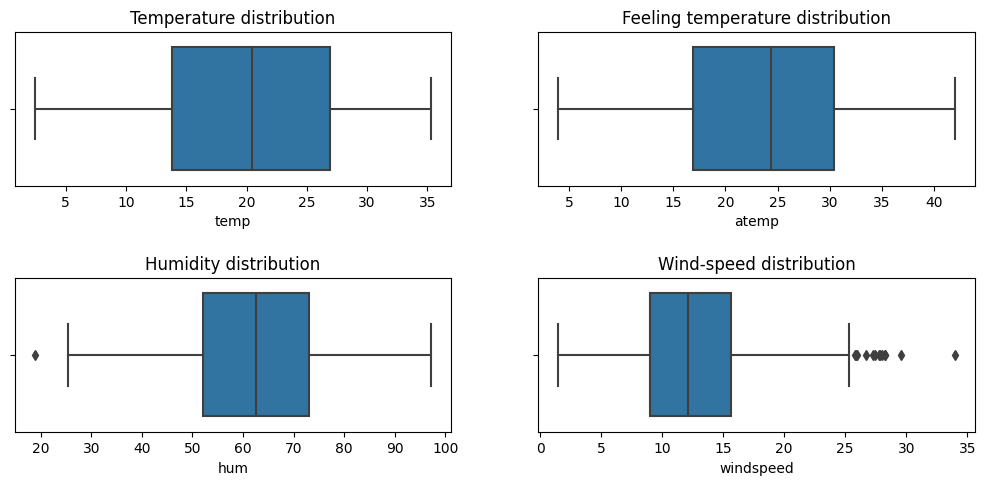

In [145]:
# Validating Continous variables for Outliers
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(x = 'temp', data = bike_data)
plt.title("Temperature distribution")
plt.subplot(2,2,2)
sns.boxplot(x = 'atemp', data = bike_data)
plt.title("Feeling temperature distribution")
plt.subplot(2,2,3)
sns.boxplot(x = 'hum', data = bike_data)
plt.title("Humidity distribution")
plt.subplot(2,2,4)
sns.boxplot(x = 'windspeed', data = bike_data)
plt.title("Wind-speed distribution")
plt.subplots_adjust(left=0.2,bottom=0.5,right=1,top=1,wspace=0.2, hspace=0.6)
plt.show()

Observation
   - Based on the boxplot analysis , Humidity data showing '0' value as outlier , this can be human error . Validating further to decide,  whether to drop or inpute the value
   - Other than Humidity , casual and windspeed also showing some outliers and which is acceptable

In [83]:
#Looking for the Humidify distribution
bike_data['hum'].describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

In [84]:
#Filtering the details against  the humidity marked as '0'
bike_data[bike_data['hum'] == 0]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
68,2018-03-10,spring,0,March,0,Thursday,1,Light Snow,15.952731,19.2834,0.0,17.545759,623,10


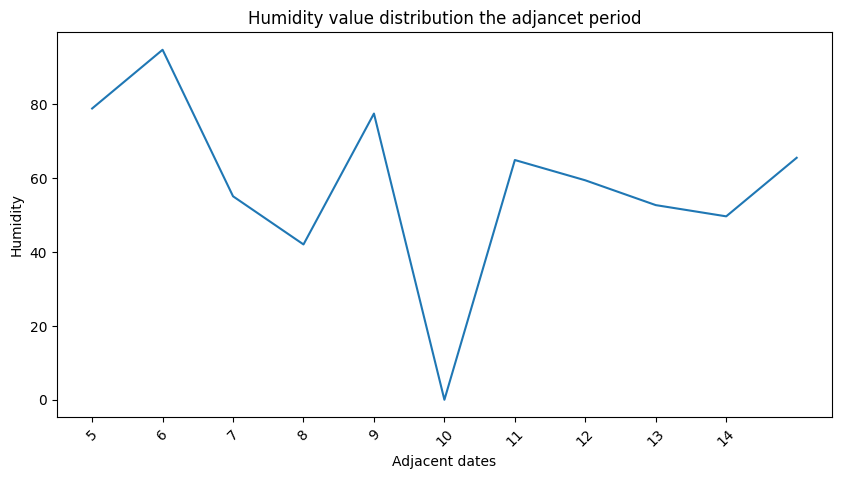

In [85]:
# Tring to plot a line graph with adjacent date to see the pattern of Humidity reported
# taking 5 days before and after 10th March 2018  and trying to analyse the data
hum_0_range = bike_data[(bike_data['dteday'] >= '2018-03-05') & (bike_data['dteday'] <= '2018-03-15')]['hum']
date_0_range = bike_data[(bike_data['dteday'] >= '2018-03-05') & (bike_data['dteday'] <= '2018-03-15')]['day']
plt.figure(figsize=(10,5))
sns.lineplot(x=date_0_range,y=hum_0_range)
plt.xticks(rotation=45)
plt.xticks(range(5,15))
plt.title('Humidity value distribution the adjancet period')                  
plt.xlabel('Adjacent dates') 
plt.ylabel('Humidity') 
plt.show()

Observation
  - There is a sudden dip in humidity to '0' on 10th of March 2018 , this can be human error, so will try to impute the data to average of this period  instead of whole average.

In [86]:
# In order to impute the humidity , calculating the mean of the adjacent 15days and imputing that value.
bike_data['hum']=bike_data['hum'].replace(0,hum_0_range.mean())

In [87]:
#Humidity got updated to 58.
bike_data[bike_data['dteday'] =='2018-03-10']

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
68,2018-03-10,spring,0,March,0,Thursday,1,Light Snow,15.952731,19.2834,58.264818,17.545759,623,10


In [88]:
# Windspeed max value is 34 and its median lies at 12.
bike_data.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [89]:
# Dropping column 'dteday' , whose extracted content like day, month and year available in the data frame.
# Also 'dteday' datatype is datetime and it will create issues in the model training.
bike_data.drop(columns=['dteday'],inplace=True)

In [90]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,5


### Correlation Analysis

 - Correlation between all the continous variables
 - Correlation between independent and dependent variables
 - Correlation between catogorical variable vs dependent variables


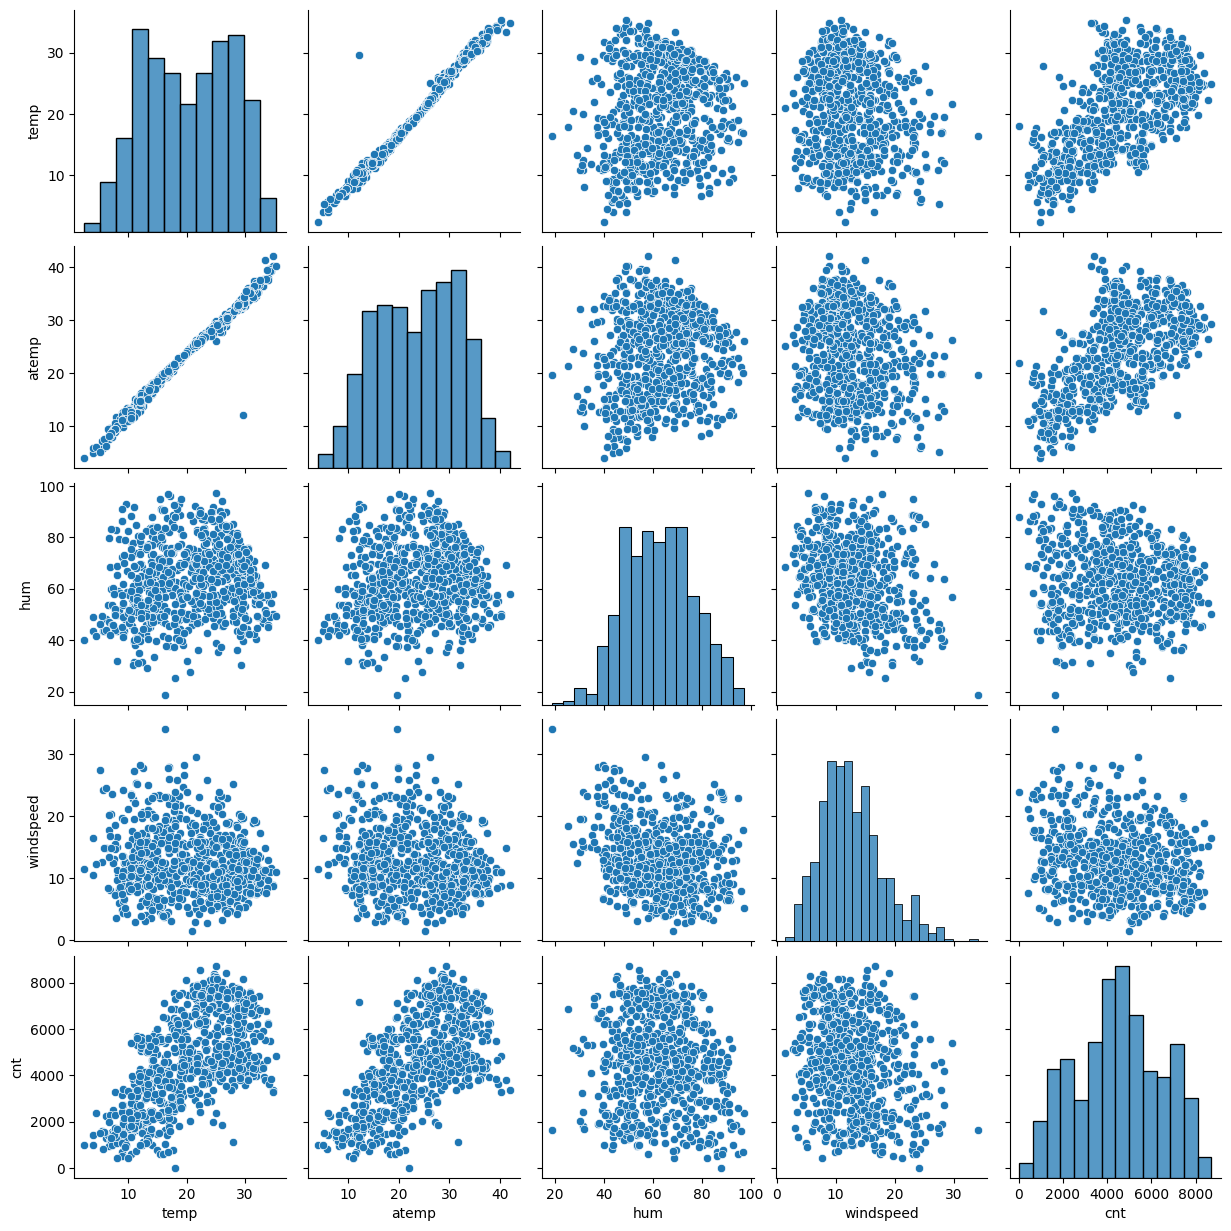

In [91]:
# Corellation between all the continous variables
sns.pairplot(bike_data,vars = ['temp','atemp','hum','windspeed','cnt'])
plt.xlabel("Pair Plot Analysis across Continous Variable")
plt.show()

Observation
- There is a linear correlation between atemp and temp. temp is actual temperature and atemp is feeling temperature on the same day. So they have good correlation
- There is a Linear correlation between atemp,temp with Count of the bike rented , so this can be a good predictor variable
- Also there is a significant correlation between humidity and temp - this can leads to multicollinearity in the Multiple linear regression model
- Windspeed also showing some correlation -- Need to check heatmap or correlation metrics to find the exact the correlation between the variables

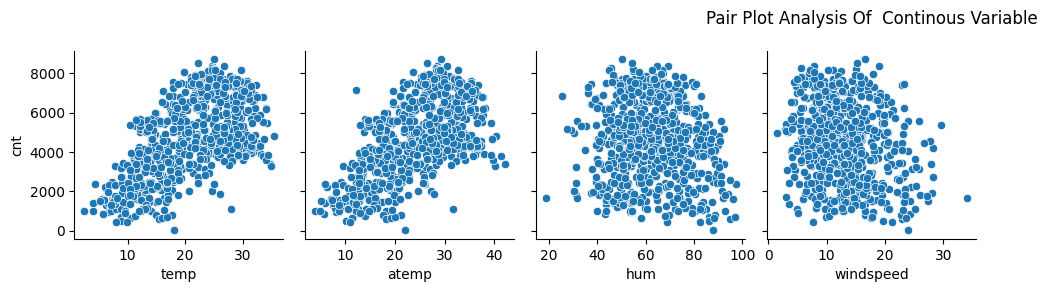

In [92]:
# Correlation between continous variable and dependent variable(cnt)
sns.pairplot(bike_data,x_vars = ['temp','atemp','hum','windspeed'],y_vars ='cnt')
plt.title("Pair Plot Analysis Of  Continous Variable", y=1.1)
plt.show()

Observation
- Above pair plot , plots the relation between temp,atemp,humidity and windspeed with Count of Bike booking.
- Based on the above plot , both temp and atemp showing a linear relationship
- Both humidity and windspeed showing significant correlation with Count . Need to validate further

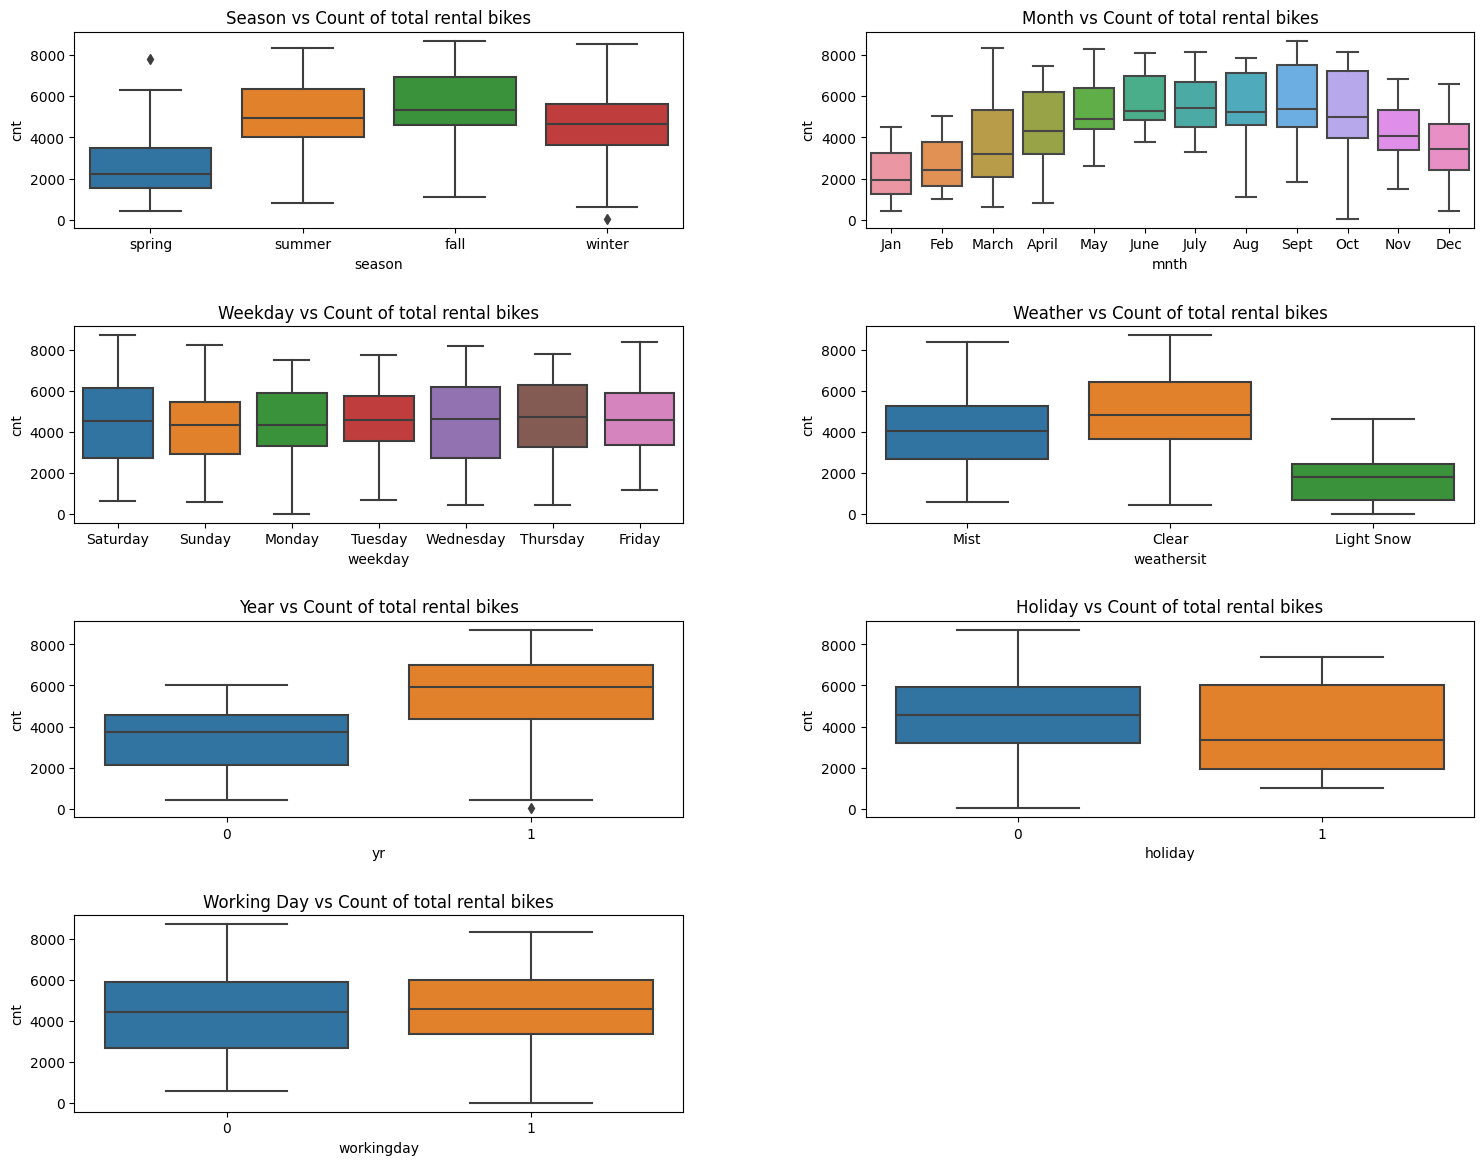

In [93]:
# Correlation between Categorical and Dependent variables

plt.figure(figsize=(20,18))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.title("Season vs Count of total rental bikes")

plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.title("Month vs Count of total rental bikes")

plt.subplot(4,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.title("Weekday vs Count of total rental bikes")

plt.subplot(4,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.title("Weather vs Count of total rental bikes")

plt.subplot(4,2,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.title("Year vs Count of total rental bikes")

plt.subplot(4,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.title("Holiday vs Count of total rental bikes")

plt.subplot(4,2,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.title("Working Day vs Count of total rental bikes")

plt.subplots_adjust(left=0.2,bottom=0.4,right=0.9,top=1,wspace=0.3, hspace=0.5)
plt.show()

Observation 
- During summmer and fall , the usage of rental bikes increases and during winter , its usage slowly reduces. During Spring the usage is less
- Year on Year the usage of Rental bike increases - compared to 2018 , 2019 usage is more
- March to October time frame the usage of rental bike increases and during Year end and Year begin usage is less. This can be due to the Holiday/vecation season

In [94]:
# Checking the correlation metrix
bike_data.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day
yr,1.000000e+00,0.008195,-0.002945,0.048789,0.047215,-0.119758,-0.011624,0.569728,-1.856233e-16
holiday,8.195345e-03,1.000000,-0.252948,-0.028764,-0.032703,-0.016852,0.006257,-0.068764,-1.037108e-02
workingday,-2.945396e-03,-0.252948,1.000000,0.053470,0.052940,0.027385,-0.018666,0.062542,8.520708e-03
temp,4.878919e-02,-0.028764,0.053470,1.000000,0.991696,0.126997,-0.158186,0.627044,2.600883e-02
atemp,4.721519e-02,-0.032703,0.052940,0.991696,1.000000,0.140327,-0.183876,0.630685,1.992047e-02
hum,-1.197575e-01,-0.016852,0.027385,0.126997,0.140327,1.000000,-0.246636,-0.111295,3.714189e-02
windspeed,-1.162435e-02,0.006257,-0.018666,-0.158186,-0.183876,-0.246636,1.000000,-0.235132,2.192539e-02
cnt,5.697285e-01,-0.068764,0.062542,0.627044,0.630685,-0.111295,-0.235132,1.000000,-2.141931e-02
day,-1.856233e-16,-0.010371,0.008521,0.026009,0.019920,0.037142,0.021925,-0.021419,1.000000e+00


In [95]:
print(bike_data.atemp.corr(bike_data.cnt))
print(bike_data.temp.corr(bike_data.cnt))

0.6306853489531039
0.6270440344135154


Observation 
- temp and atemp showing almost same correlation ( ~.62 )with Count and which strong
- humidity showing negative correlation and which is very week
- workingday is another variable a strong positive correlation with Count 
- Holiday showing a negative strong correlation with count - Meaning is  , during holiday people prefer their own vehicle or they may be at home.
  so basically , may be while going to office, customer may prefer these bikes , like a public transport

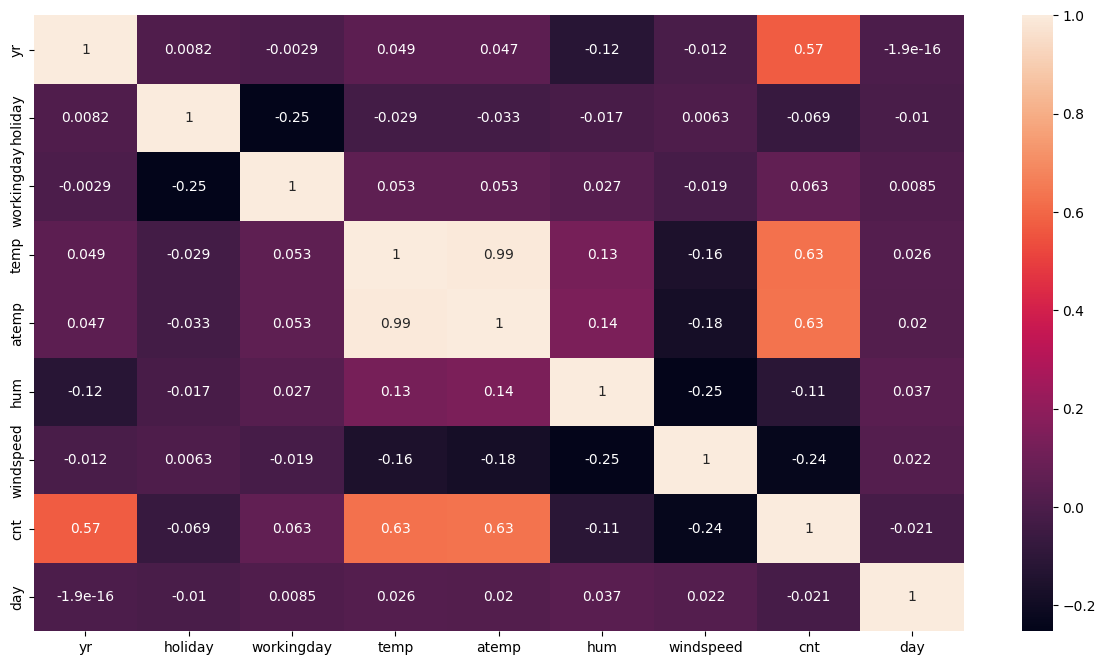

In [96]:
# Heatmap correlation between all the variable
plt.figure(figsize=(15,8))
sns.heatmap(bike_data.corr(),annot=True)
plt.show()

Observation 
- temp and atemp showing almost same correlation ( ~.62 )with Count and which strong
- humidity showing negative correlation and which is very week
- workingday is another variable a strong positive correlation with Count 
- Holiday showing a negative strong correlation with count - Meaning is  , during holiday people prefer their own vehicle or they may be at home.
  so basically , may be while going to office, customer may prefer these bikes , like a public transport

## Summary from the Exploratary Analysis
- Based on the analysis,  there are some variables like , atemp,temp,humidity,workingday,holiday showing some correlation with count variable
- And this relation is linear , thus Multiple linear regression can be used for the Machine learning and  Modelling

## Step 3: Data Modelling
 - Dummy variable creation  
     - Catogorical variable has to converted to integer inorder to perform the Modelling.
 - Test / Train Split   
     - Regression algorithm will be trained on Train data and Tested on Test data. Out of Total 70% data will be allocated for Train and remaining for Test
 - Scaling the variables
     - Scaling the variable will not affect the Model parameters except coefficeints , Scaling will help Model interpretation and will help in covergence of the gradient descent        of the linear regression algorithm
 - Define the dependent and independet variables
     - Based on the Problem statement, define the Predictor and Target variable

In [97]:
# Catogorical variables encoding to '0' and '1'  , based on the Dummy logic
dummy_variables =['season','mnth','weekday','weathersit']
dummy_data = pd.get_dummies(bike_data[dummy_variables],drop_first=True)

In [98]:
# Viewing the new data frame created . get_dummy method converts the catogorical variables to 0,1 combination
dummy_data.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [99]:
# Creating a new dataframe with new dummy frame and existing dataframe
bike_data1 = pd.concat([bike_data,dummy_data],axis=1)
bike_data1 = bike_data1.drop(columns=dummy_variables)

In [100]:
# Listing new data frame.
bike_data1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,season_spring,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,2,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,3,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,4,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,5,1,...,0,0,0,0,0,0,0,1,0,0


In [101]:
# Validating all the data types . In order to perform the machine learning all the data types has to be numeric
bike_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   day                    730 non-null    int64  
 9   season_spring          730 non-null    uint8  
 10  season_summer          730 non-null    uint8  
 11  season_winter          730 non-null    uint8  
 12  mnth_Aug               730 non-null    uint8  
 13  mnth_Dec               730 non-null    uint8  
 14  mnth_Feb               730 non-null    uint8  
 15  mnth_J

#### Train - Test split of dataset with a ratio of 70:30

In [102]:
# Splitting the data using train_test_split method form sklearn
df_train,df_test = train_test_split(bike_data1,train_size=0.7,random_state=100)

In [103]:
print("Shape of the Train Data Set :",df_train.shape)
print("Shape of the Test Data Set :",df_test.shape)

Shape of the Train Data Set : (510, 31)
Shape of the Test Data Set : (220, 31)


#### Feature Scaling 
- Feature scaling helps model interpretation and it improves the Model training
- temp,atemp,humidity,windspeed,cnt are the variables good candidate for scaling.
- rest of the variables are in the scale of 0 or 1

In [104]:
# To perform scaling , MinMaxScaler is used, MinMax Scaler adjust values to 1 and 0.
feature_scaler = MinMaxScaler()

In [105]:
scalar_vars =['temp','atemp','hum','windspeed','cnt']
df_train[scalar_vars] = feature_scaler.fit_transform(df_train[scalar_vars])

In [106]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,season_spring,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
576,1,0,1,0.815169,0.766351,0.659744,0.264686,0.827658,31,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.553780,0.255342,0.465255,3,1,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.377528,0.663106,0.204096,30,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.385516,0.188475,0.482973,28,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.692225,0.380981,0.191095,22,0,...,0,0,0,0,0,0,0,0,0,1


In [107]:
# Describing the data frame. currently max values are 1 in all the variables.
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,season_spring,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.568003,0.320883,0.513499,15.592157,0.243137,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.177317,0.169803,0.224421,8.911833,0.429398,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.428913,0.199179,0.356420,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.570553,0.296763,0.518638,16.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.695953,0.414447,0.684710,23.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
#Looking for the correlation across all the variables in the Training data set
df_train.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,season_spring,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
yr,1.000000,-0.014980,0.031808,0.108054,0.104971,-0.094119,-0.000439,0.591433,0.006886,-0.036320,...,-0.025933,0.002574,0.053634,-0.033817,-0.000812,-6.153420e-03,-0.000296,-0.001452,-6.076399e-02,-0.011388
holiday,-0.014980,1.000000,-0.233863,-0.066405,-0.070760,-0.031142,0.017458,-0.095948,0.000422,0.053339,...,-0.004302,0.043692,0.279279,-0.069242,-0.066102,9.759407e-03,-0.062897,-0.070276,-2.815377e-02,-0.038895
workingday,0.031808,-0.233863,1.000000,0.068326,0.068349,0.038877,-0.042704,0.092019,0.030462,-0.037932,...,-0.046584,0.019495,0.174565,-0.619074,-0.591001,2.465943e-01,0.268948,0.300501,2.115873e-02,0.043563
temp,0.108054,-0.066405,0.068326,1.000000,0.989539,0.153750,-0.187281,0.645048,0.023579,-0.606396,...,-0.018286,0.207212,-0.032455,-0.042608,-0.017367,2.518482e-03,0.048662,0.029020,-3.622709e-02,-0.089452
atemp,0.104971,-0.070760,0.068349,0.989539,1.000000,0.168435,-0.215108,0.647944,0.015985,-0.611118,...,-0.005162,0.205900,-0.025473,-0.043785,-0.014223,6.021767e-03,0.051493,0.027554,-4.439780e-02,-0.085086
hum,-0.094119,-0.031142,0.038877,0.153750,0.168435,1.000000,-0.265136,-0.076307,0.010412,-0.191115,...,0.168002,0.153058,0.019268,-0.045205,0.008785,-1.828974e-02,0.009124,0.044224,2.972215e-01,0.483062
windspeed,-0.000439,0.017458,-0.042704,-0.187281,-0.215108,-0.265136,1.000000,-0.253038,0.011404,0.180351,...,-0.018546,-0.121930,-0.004658,0.049063,-0.001499,-4.619727e-03,-0.004101,-0.019862,8.677832e-02,-0.029892
cnt,0.591433,-0.095948,0.092019,0.645048,0.647944,-0.076307,-0.253038,1.000000,0.020019,-0.548987,...,0.055558,0.201639,-0.009333,-0.015998,-0.063214,9.927716e-03,0.030528,0.025468,-2.266784e-01,-0.169715
day,0.006886,0.000422,0.030462,0.023579,0.015985,0.010412,0.011404,0.020019,1.000000,-0.054640,...,0.078895,-0.042345,0.027314,-0.012649,-0.027813,3.714503e-03,0.000212,0.000021,1.449185e-02,-0.074687
season_spring,-0.036320,0.053339,-0.037932,-0.606396,-0.611118,-0.191115,0.180351,-0.548987,-0.054640,1.000000,...,-0.171986,-0.167580,-0.009212,0.022641,0.003276,6.274901e-03,-0.030988,-0.008680,-4.455809e-02,0.011613


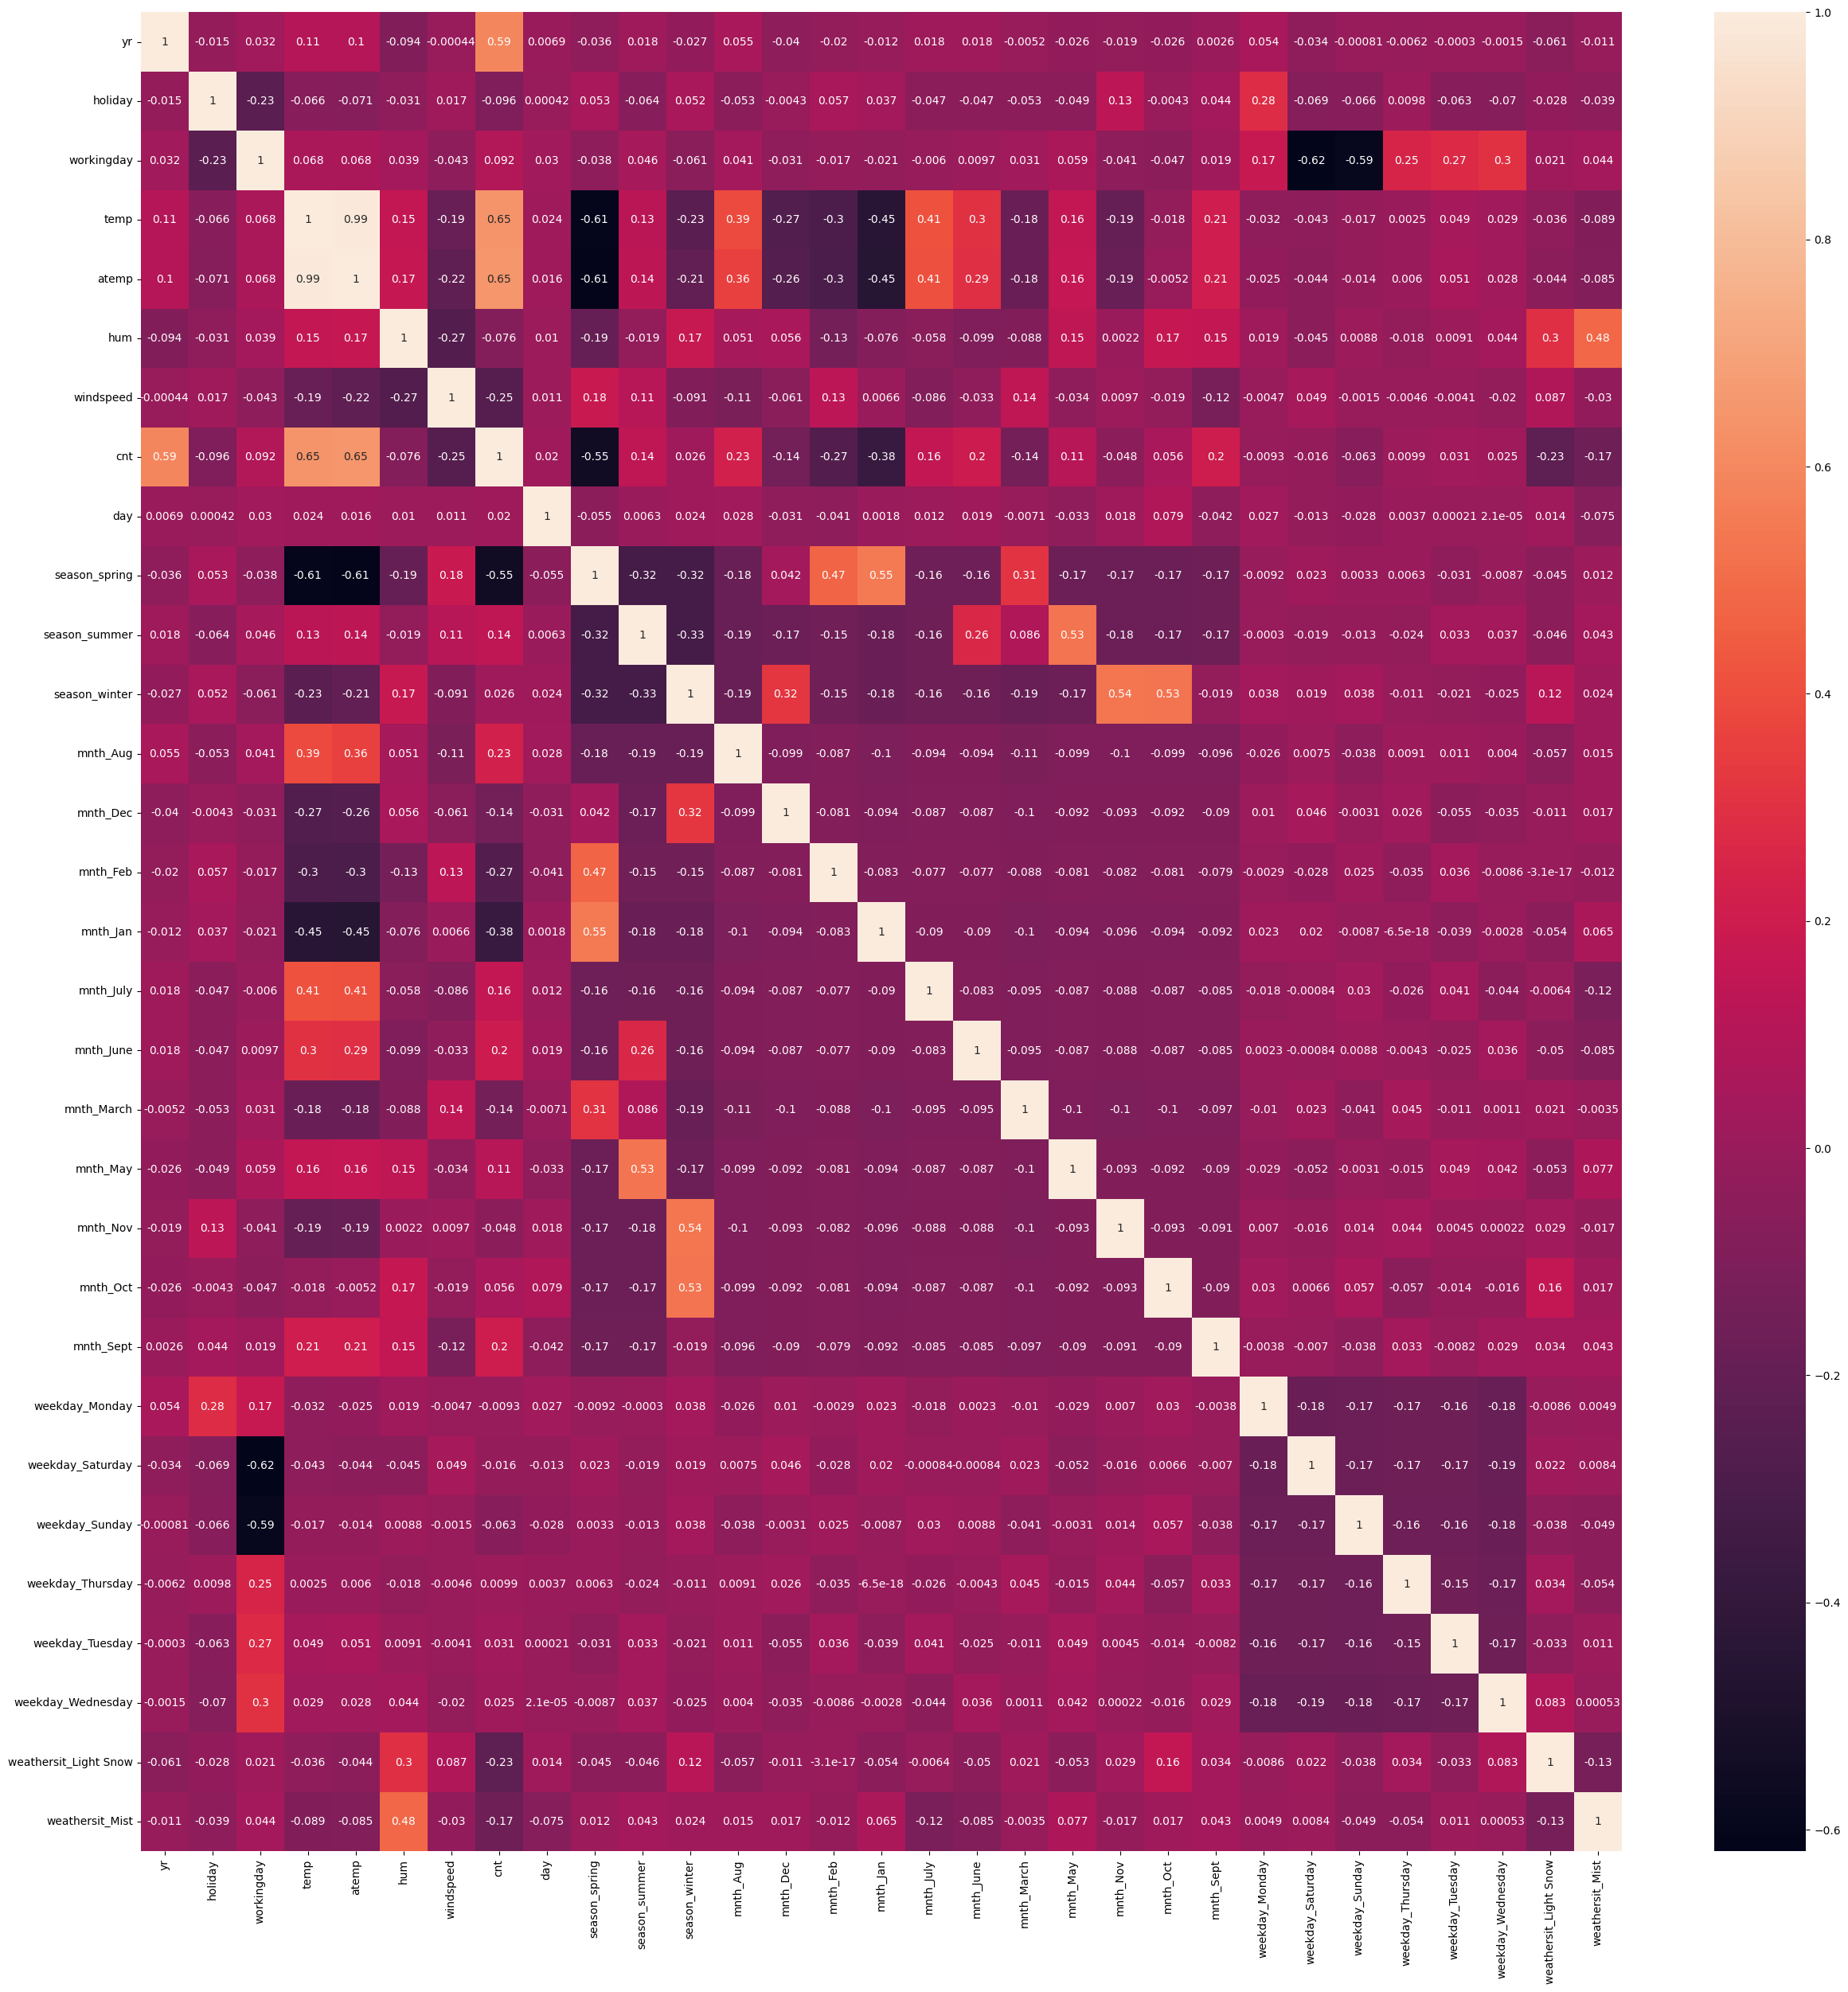

In [109]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

Observation
 - atemp, temp showing a high correlation with target variable count

#### Define the Independent (X) and Dependent (y) variables

In [110]:
y_train = df_train.pop('cnt')
X_train = df_train

In [111]:
print("Shape of the X Train Data Set :",X_train.shape)
print("Shape of the y Train Data Set :",y_train.shape)

Shape of the X Train Data Set : (510, 30)
Shape of the y Train Data Set : (510,)


In [112]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'day', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

Model Building Process
- In the model building process , first following the Recursive featue elimination (RFE) , to find the features which are influencing the target variable 
    - Recursive Feature Elimination  - RFE  - Listing top 15 influencing features
    - Building the model  and eliminating less influencing features one by one

In [113]:
# Using LinearRegression method to fit the model based on the Train Data Set
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [114]:
# Using RFE method and selecting top 15 features 
rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [115]:
# Listing the list of features which are selected and its ranking
rfe_df = pd.DataFrame({'feature': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,feature,Select Status,Ranking
0,yr,True,1
24,weekday_Sunday,True,1
23,weekday_Saturday,True,1
21,mnth_Sept,True,1
15,mnth_July,True,1
28,weathersit_Light Snow,True,1
10,season_winter,True,1
9,season_summer,True,1
29,weathersit_Mist,True,1
6,windspeed,True,1


In [116]:
# Creating a function to display the VIF of the selected the columns . This will help in model building , iteratively we can delete columns and calculate its VIF 
#( Multicollinearity measure).

def print_vif_col(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
print_vif_col(X_train.columns)

,Features,VIF
2,workingday,80.47
3,temp,66.99
4,atemp,56.23
23,weekday_Saturday,18.48
24,weekday_Sunday,17.05
8,season_spring,10.83
10,season_winter,9.52
9,season_summer,8.29
19,mnth_Nov,6.81
20,mnth_Oct,6.50


In [117]:
# rfe.support_ provides list of features are selected 
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_July',
       'mnth_Sept', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

### Mode 1 : First model creating based on the 15 features selected by RFE method

In [118]:
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lm_model = sm.OLS(y_train, X_train_sm).fit()
print(lm_model.summary())
print_vif_col(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.8
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          2.02e-191
Time:                        10:59:17   Log-Likelihood:                 517.66
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

,Features,VIF
2,workingday,41.74
11,weekday_Saturday,10.18
12,weekday_Sunday,9.81
6,season_spring,5.05
3,temp,3.67
8,season_winter,3.51
7,season_summer,2.63
1,holiday,2.57
4,hum,2.08
14,weathersit_Mist,1.64


Observation:
- Rsquare - 0.847 , which is good
- Adjusted R square and Prob (F-statistic) are looks good , will look in to features
- P value showing < 0.5  , means features are significant 
- Holiday showing 0.386 P value , will try to drop one variable and verify its significance level
- Workingday showing higher VIF,  this can be dropped from feature list for the next model validation

### Model 2:  Dropping the 'workingday' feature,  which  was showing higher VIF

In [119]:
col = col.drop('workingday')
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print_vif_col(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.8
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          2.02e-191
Time:                        10:59:18   Log-Likelihood:                 517.66
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

,Features,VIF
3,hum,20.13
2,temp,13.30
4,windspeed,4.82
5,season_spring,3.38
7,season_winter,2.91
6,season_summer,2.60
13,weathersit_Mist,2.48
0,yr,2.09
8,mnth_July,1.59
9,mnth_Sept,1.37


Observation
   - R Square - 0.847 , means model able to explain 84% of the variance in Count
   - P value of weekday_Saturday is high , will try to drop this variable
   - Humidity, temp, hum showing higher VIF values , will validate it in the iterative process

### Mode3 : Dropping "weekday_Saturday" feature ,  whose P value is higher

In [120]:
col = col.drop(['weekday_Saturday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print_vif_col(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.9
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          1.96e-192
Time:                        10:59:18   Log-Likelihood:                 517.28
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     496   BIC:                            -947.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

,Features,VIF
3,hum,20.13
2,temp,13.24
4,windspeed,4.79
5,season_spring,3.35
7,season_winter,2.88
6,season_summer,2.59
12,weathersit_Mist,2.48
0,yr,2.09
8,mnth_July,1.59
9,mnth_Sept,1.37


Observation
   - R Square - 0.847 , means model able to explain 84% of the variance in Count
   - Humidity, showing higher VIF values , will drop this feature and check and impact

### Model 4:   Dropping the 'Humidity' feature,  which  was showing higher VIF 

In [121]:
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print_vif_col(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          1.45e-189
Time:                        10:59:18   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

,Features,VIF
2,temp,5.14
3,windspeed,4.60
5,season_summer,2.24
4,season_spring,2.11
0,yr,2.07
6,season_winter,1.81
7,mnth_July,1.59
11,weathersit_Mist,1.56
8,mnth_Sept,1.34
9,weekday_Sunday,1.18


Observation
   - R Square - 0.841 , means model able to explain 84% of the variance in Count
   - temp, showing higher VIF values , will drop this feature and check and impact

### Model 6:   Dropping the 'temp' feature,  which  was showing higher VIF 

In [122]:
col = col.drop(['temp'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print_vif_col(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.6
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          1.55e-150
Time:                        10:59:18   Log-Likelihood:                 412.38
No. Observations:                 510   AIC:                            -800.8
Df Residuals:                     498   BIC:                            -749.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.59

,Features,VIF
2,windspeed,3.83
3,season_spring,2.09
4,season_summer,2.03
0,yr,1.84
5,season_winter,1.77
10,weathersit_Mist,1.52
6,mnth_July,1.21
8,weekday_Sunday,1.17
7,mnth_Sept,1.16
9,weathersit_Light Snow,1.08


Observation
   - R Square - dropped from 0.847 to  0.769 , temp is a influencing feature , so need to include that.
  

### Model 7:   Adding  the 'temp' feature,  which was dropping the R Sqaure while dropping it

In [123]:
col = ['yr', 'holiday','temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_July',
       'mnth_Sept', 'weekday_Sunday',
       'weathersit_Light Snow', 'weathersit_Mist']
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print_vif_col(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          1.45e-189
Time:                        10:59:18   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

,Features,VIF
2,temp,5.14
3,windspeed,4.60
5,season_summer,2.24
4,season_spring,2.11
0,yr,2.07
6,season_winter,1.81
7,mnth_July,1.59
11,weathersit_Mist,1.56
8,mnth_Sept,1.34
9,weekday_Sunday,1.18


Observation
 - R Square value improved as earlier
 - season_spring showing slightly high p value compared to other, will drop this feature and check the impact

### Model 8:   Dropping   the 'season_spring' feature and checking the impact in the model

In [124]:
col = ['yr', 'holiday','temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_July',
       'mnth_Sept', 'weekday_Sunday',
       'weathersit_Light Snow', 'weathersit_Mist']
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print_vif_col(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.7
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          1.23e-188
Time:                        10:59:18   Log-Likelihood:                 502.62
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     498   BIC:                            -930.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

,Features,VIF
2,temp,5.10
3,windspeed,3.12
0,yr,2.01
4,season_summer,1.76
6,mnth_July,1.52
10,weathersit_Mist,1.49
5,season_winter,1.46
7,mnth_Sept,1.29
8,weekday_Sunday,1.17
9,weathersit_Light Snow,1.08


Obervation
 - mnth_July showing higher p values, means this feature is insignicant based on the Null hypothesis
 - will drop this feature and check the model strength

### Model 9:   Dropping   the 'mnth_July' feature and checking the impact in the model

In [125]:
col = ['yr', 'holiday','temp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_Sept', 'weekday_Sunday',
       'weathersit_Light Snow', 'weathersit_Mist']
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print_vif_col(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     255.0
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          6.34e-189
Time:                        10:59:18   Log-Likelihood:                 500.42
No. Observations:                 510   AIC:                            -978.8
Df Residuals:                     499   BIC:                            -932.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

,Features,VIF
2,temp,3.73
3,windspeed,3.08
0,yr,2.00
4,season_summer,1.57
9,weathersit_Mist,1.48
5,season_winter,1.39
6,mnth_Sept,1.21
7,weekday_Sunday,1.17
8,weathersit_Light Snow,1.08
1,holiday,1.04


Observation :
   - R Square is 0.84 , means 84 % of the Variance in the Count of Bike booking able to explained by this model
   - VIF is looks good , which is below 5 and this addressed all the multicollinearity 

## Step 4: Model Evaluation
- Residual analysis
- checking error terms are dependent or independent
- homoscedasticity of error terms 
- Predicting the Target variables

In [126]:
# Predicting training set based on the current model
y_train_pred = lr_model.predict(X_train_sm)

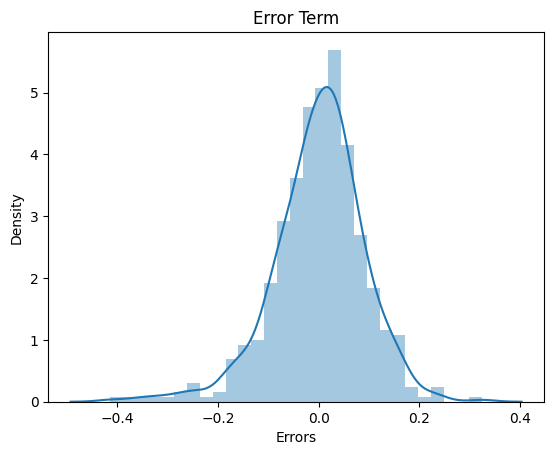

In [127]:
# Plot the histogram of the error terms
sns.distplot(y_train - y_train_pred)
plt.title('Error Term')                  
plt.xlabel('Errors')  
plt.show()

Observation
 - Error terms normally distributed with mean 0
 - Nothing suspicious in the error terms

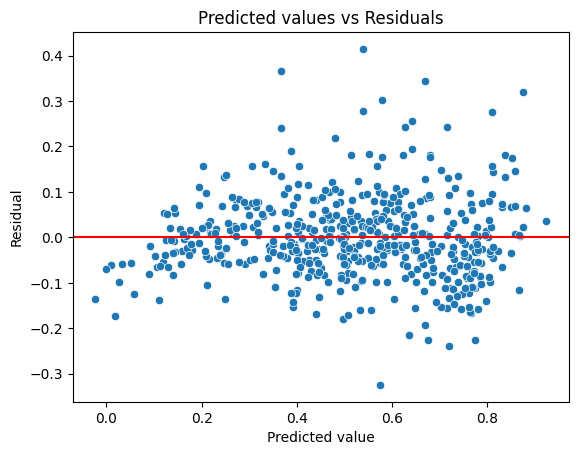

In [128]:
# Ploting residual values
residual= y_train_pred - y_train 
sns.scatterplot(x= y_train_pred, y=residual)
plt.title("Predicted values vs Residuals")
plt.axhline(y=0 ,color='red')
plt.xlabel("Predicted value")
plt.ylabel("Residual")
plt.show()

Obervation
- Error variance constant and not following any specific pattern
- Homosceadicity of error terms visible from the graph

### Target Variable prediction using the Test data set and final Model

In [129]:
# Calculating the Target variable in the test data set
num_vars =['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = feature_scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,season_spring,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
184,0,1,0,0.831783,0.769660,0.575080,0.084219,0.692706,4,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.516506,0.153728,0.712034,20,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.798722,0.334206,0.303382,27,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.301917,0.339570,0.547400,10,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.149627,0.537414,0.569029,2,0,...,0,0,0,0,0,1,0,0,0,0


In [130]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,season_spring,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.551340,0.313293,0.522154,16.018182,0.254545,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.184403,0.159584,0.219163,8.555467,0.436599,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.084665,-0.042808,0.048205,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.416134,0.198843,0.378595,8.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.535676,0.300126,0.524678,15.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.682271,0.402718,0.677750,24.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002662,0.807474,0.963300,31.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
# Defining the X_test and y_test 
y_test = df_test.pop('cnt')
X_test = df_test

In [132]:
# dataframe of selected features based on the final model features
col = ['yr', 'holiday','temp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_Sept', 'weekday_Sunday','weathersit_Light Snow', 'weathersit_Mist']
X_test = X_test[col]

In [133]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

In [134]:
#predicting test values
y_test_pred = lr_model.predict(X_test_sm)

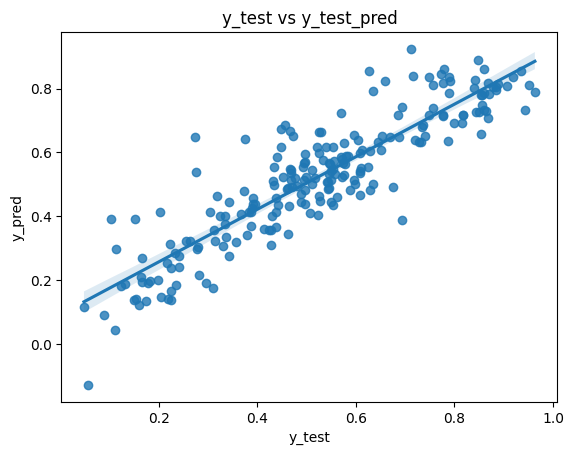

In [135]:
# Plotting the regression plot of the predicted values and fiting the line
sns.regplot(x=y_test, y= y_test_pred)
plt.title('y_test vs y_test_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')
plt.show()

In [136]:
# Calculating the R Square value of the Train Data Set
print("r2 score on train data",r2_score(y_train, y_train_pred))# - y_train 
r2_train = r2_score(y_train, y_train_pred)

r2 score on train data 0.836328851648054


In [137]:
# Calculating Adjusted-R^2 value for the Train dataset

adjusted_r2 = round(1-(1-r2_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
print(adjusted_r2)

0.8261


In [138]:
# Calculating the R Square value of the Test Data Set
print("r2score on test data",r2_score(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

r2score on test data 0.7965077591496225


In [139]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r2_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7868


In [140]:
print(lr_model.summary())
print_vif_col(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     255.0
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          6.34e-189
Time:                        10:59:19   Log-Likelihood:                 500.42
No. Observations:                 510   AIC:                            -978.8
Df Residuals:                     499   BIC:                            -932.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

,Features,VIF
2,temp,3.73
3,windspeed,3.08
0,yr,2.00
4,season_summer,1.57
9,weathersit_Mist,1.48
5,season_winter,1.39
6,mnth_Sept,1.21
7,weekday_Sunday,1.17
8,weathersit_Light Snow,1.08
1,holiday,1.04


In [141]:
# Listing the final model features with its coefficients
round(lr_model.params,4)

const                    0.1344
yr                       0.2328
holiday                 -0.1067
temp                     0.5471
windspeed               -0.1531
season_summer            0.0878
season_winter            0.1311
mnth_Sept                0.0994
weekday_Sunday          -0.0498
weathersit_Light Snow   -0.2883
weathersit_Mist         -0.0806
dtype: float64

# Comparision between Training and Testing dataset:
    - Train dataset R-Square          : 0.8363
    - Test dataset R -Square          : 0.7965
    - Train dataset Adjusted R -Square : 0.8261  
    - Test dataset Adjusted R -Square  : 0.7868

#### Demand of bikes depends on factors like  holiday, temp, windspeed, Season ,Weekday , weather and year on year demand increases

## Model Defintion and Outcome
### Count of Bike Booking (cnt) = 0.1344 + 0.2328 * yr - 0.1067* holiday + 0.5471* temp  - 0.1531* windspeed + 0.0878* season_summer + 0.1311*seaon_winter + 0.0994 * mnth_Sept  - 0.0498* weekday_Sunday  - 0.2883 * weathersit_Light Snow - 0.0806 * weathersit_Mist         